In [60]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy
from skimage.morphology import remove_small_objects,remove_small_holes
from skimage.measure import regionprops

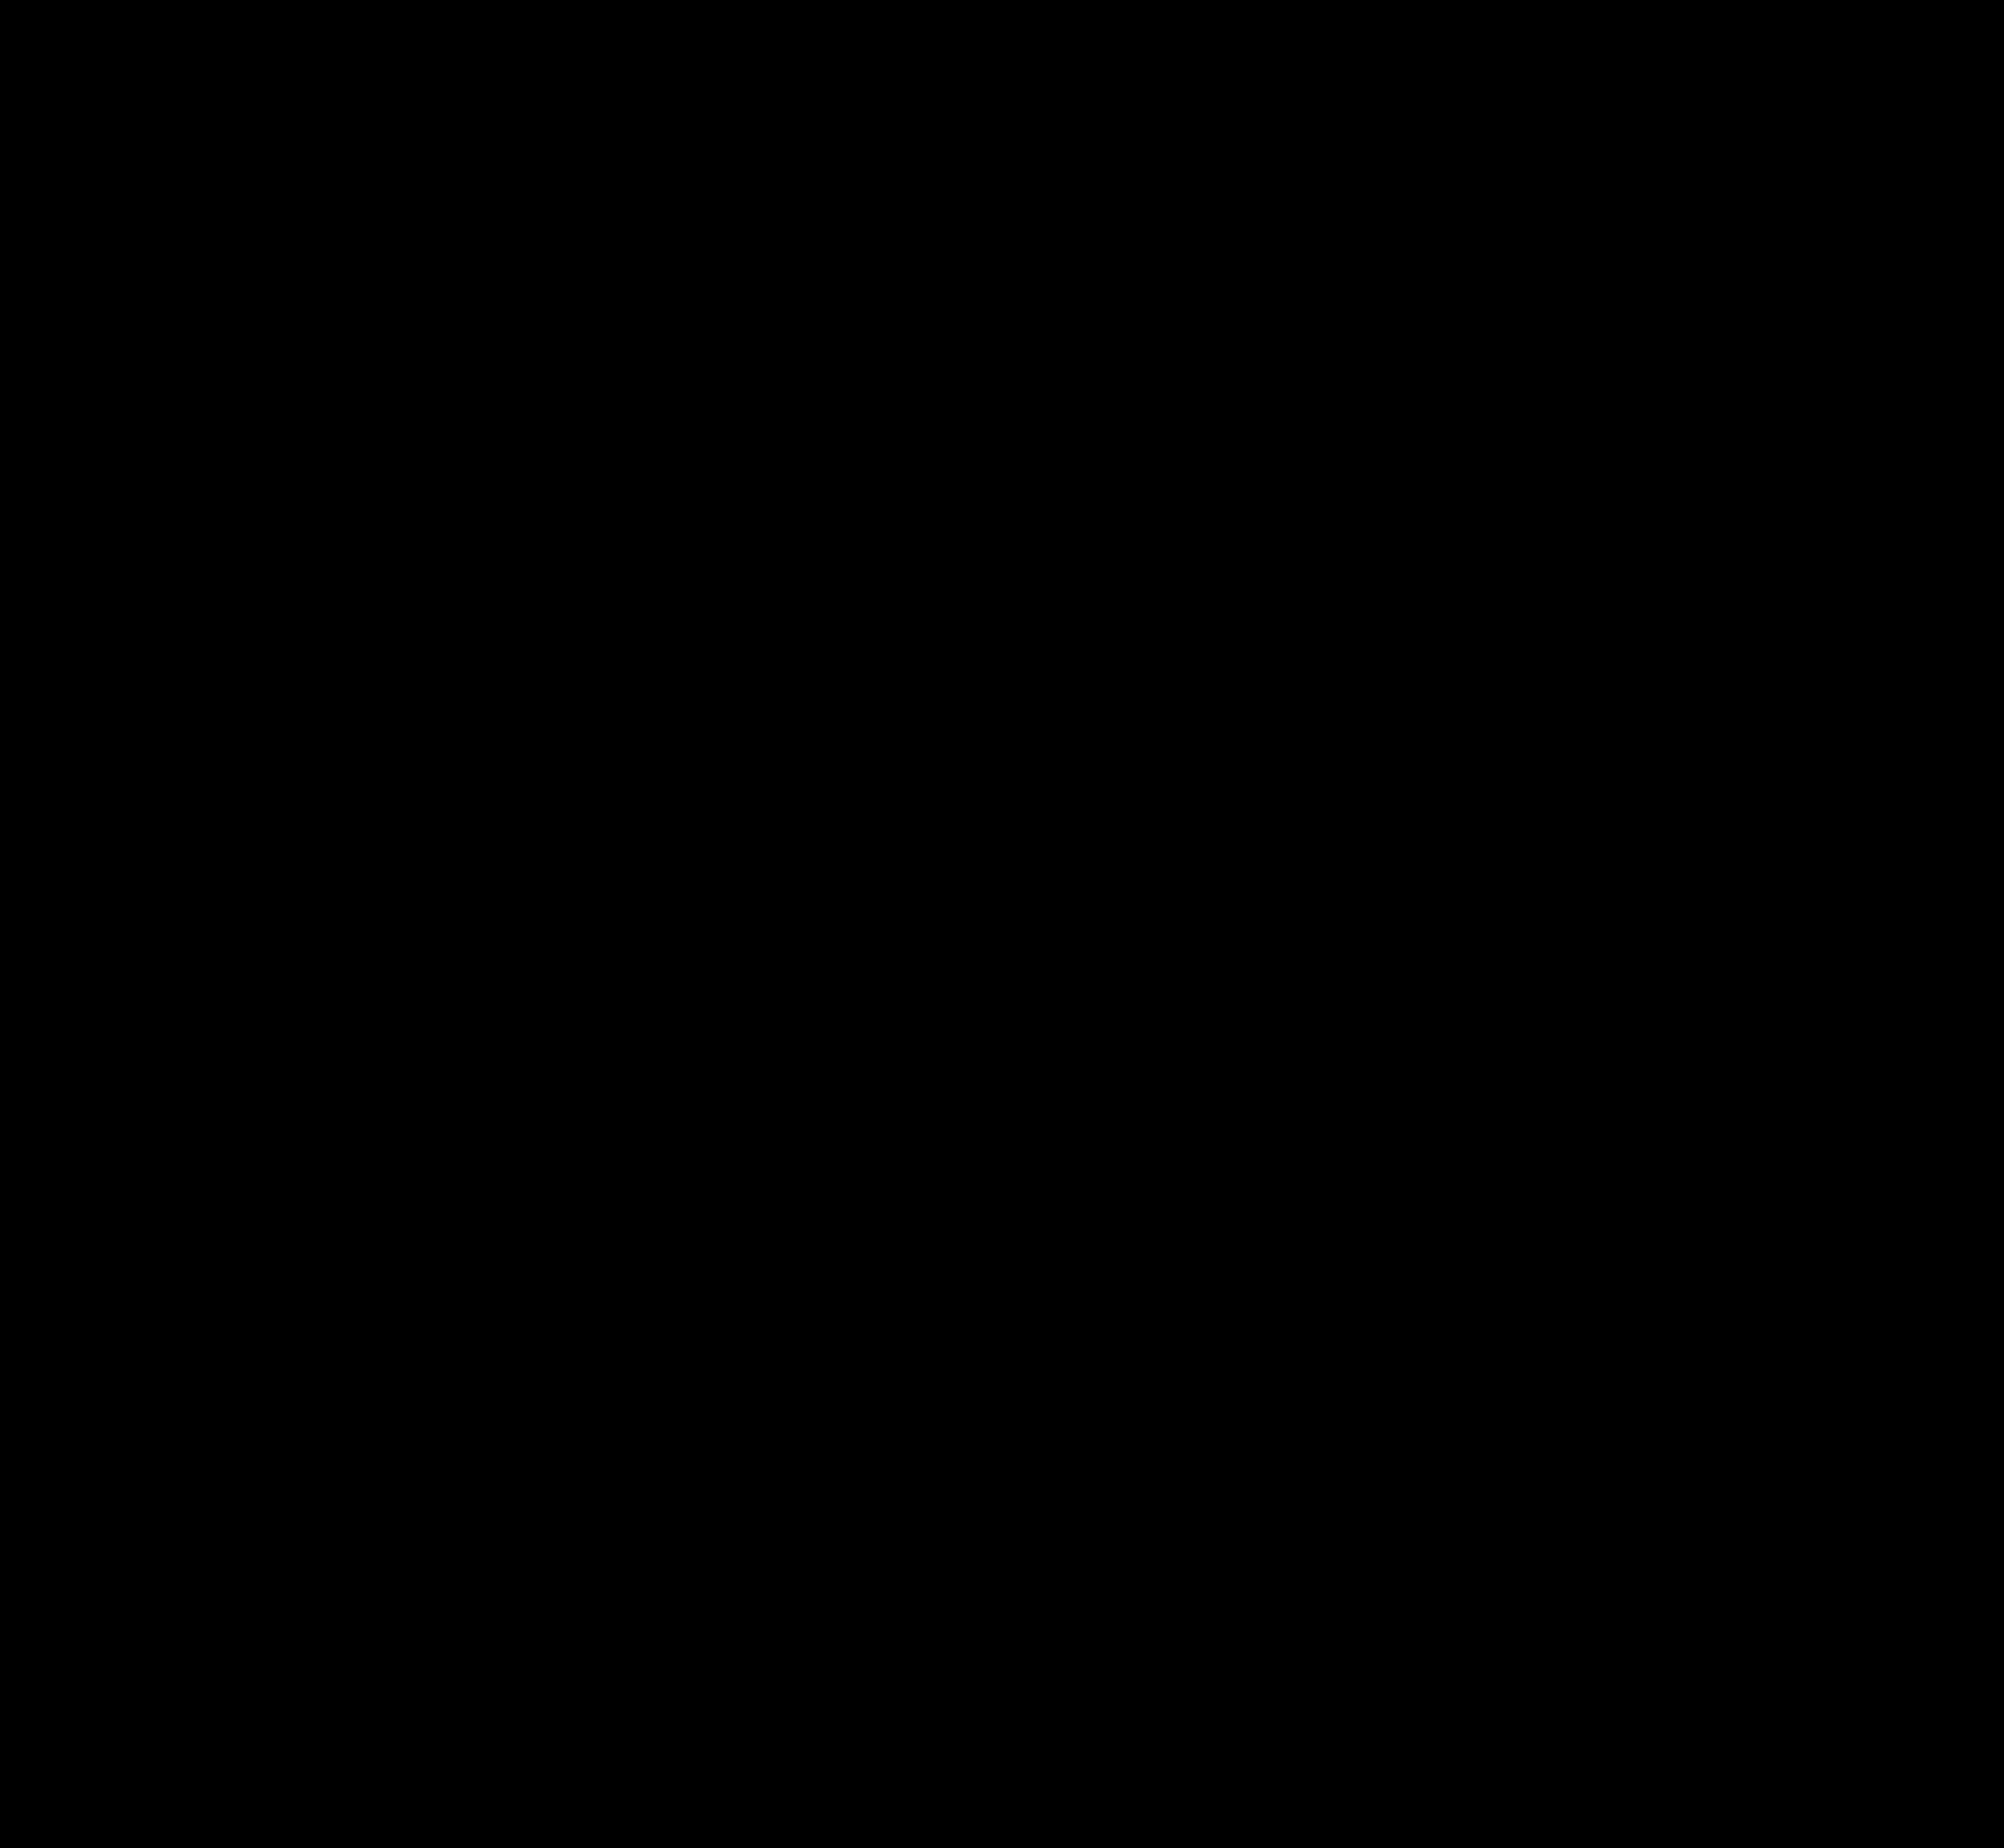

In [5]:
impth = r'\\fatherserverdw\Q\research\images\CLUE\3D study\he\c1\1um\classification_v9_combined\crop_TA\sec01\1C1_sec01.png'
im = Image.open(impth)
im

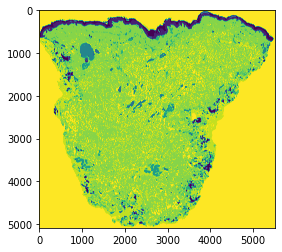

In [7]:
imarr = np.array(im)
plt.imshow(imarr)

In [26]:
collagen = deepcopy(imarr)
collagen[collagen!=10]=0


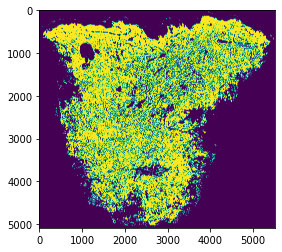

In [13]:
plt.imshow(collagen)

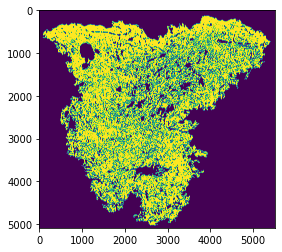

In [41]:
min_col_sz = 3000**2
collagen = remove_small_objects(collagen.astype('bool'),min_size=min_col_sz)
plt.imshow(collagen)

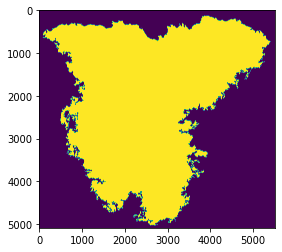

In [42]:
max_hole_sz = 1000**2
collagen = remove_small_holes(collagen,area_threshold=max_hole_sz)
plt.imshow(collagen)

In [53]:
# find contour of upper-side of binary object(collagen)
I = np.argmax(collagen,axis=0)
Xs = np.where(I>1)[0]
Ys = I[I>1]

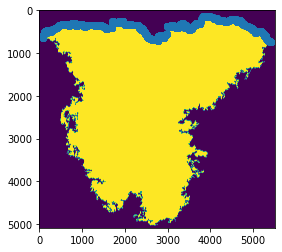

In [56]:
plt.imshow(collagen)
plt.scatter(Xs,Ys)

In [58]:
dl = np.zeros_like(imarr)
for i in range(1,13):
    bwtmp = imarr==i


1
2
3
4
5
6
7
8
9
10
11
12


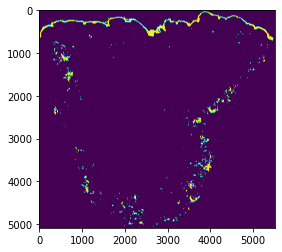

In [59]:
bwtmp = imarr==i
extrema = regionprops(bwtmp)

In [36]:
Image.fromarray(collagen).save('tmp.png')